https://www.deepl.com/translator を用いて翻訳しました.

**BERT**は、現在、様々な自然言語処理（NLP）タスクを解決するために広く使用されている最もホットなモデルアーキテクチャの一つです。そのため、このモデルについての深い知識を得ることは非常に重要です。BERTに関するブログやチュートリアルなどをいくつか見つけることができます。しかし、完全なモデルを理解するための完全なパッケージを見つけることは非常に稀です。このノートでは、いくつかの人気ブログ記事とチュートリアルを統合して、完全なパッケージを作ろうとしています。 このノートで、BERTの理解が深まることを願っています。これらのブログポストとチュートリアルのリンクは、[References](#8) に記載されている.



<h2><center>Let's Start</center></h2>  

今日はbertについてお話ししましょう。

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1557559619l/5674402.jpg"/ width="300" height="300" ></center>

$\;\;\;\;\;\;\;\;$

いやいや、Google BERTの話をしようと思っています。

<a class="anchor" id="0.1"></a>
#  Table of Contents
i.  [BERT, What is BERT !](#1)

ii.  [High Level Overview of BERT](#2)

iii.  [How BERT comes and why it becomes so popular ?](#3)

   - [Limitation of Transformer](#3.1)
   - [Transfer Learning of NLP](#3.2)
   - [Fully Replacement of LSTM](#3.3)


iv. [What is inside the BERT ?](#4)

   - [From Word to Vectors](#4.1)
   - [Encoder from the Transformer](#4.2) 
   - [Maksed Language Modeling](#4.3)
   - [Next Sentence Prediction ](#4.4)


v. [BERT as Transfer Learning in NLP](#5)


vi. [BERT for Different NLP tasks](#6)

   - [Sentence Pair Classification Task](#6.1)
   - [Single Sentence Classfication Task](#6.2)
   - [Question Answering Task](#6.3)
   - [Single Sentence Tagging Task](#6.4)


vii. [Applications](#7)


viii. [References](#8) 



# 1. BERT, What is BERT ! <a class="anchor" id="1"></a>

**BERT** (**B**idirectional **E**ncoder **R**epresentations from **T**ransformers) は、2018年にGoogle AI Languageの研究者が発表した自然言語処理（NLP）のすごい研究です。ニューラル機械翻訳、質問応答（SQuAD v1.1）、文節ペア分類タスク（MNLI）、文節分析、テキスト要約など、さまざまなNLPタスクにおける最先端の結果を提示し、機械学習コミュニティに一石を投じました。
BERTの略語から、次の特徴のようなものがわかります。

   1. Bi-directional (双方向性)
   2. Using Encoder Representation (エンコーダの表現)
   3. Transformer based architecture 

つまり、基本的にBERTの主要な技術革新は、一般的な注目モデルであるTransformerの双方向トレーニングを言語モデリングに適用することです。これは、テキストシーケンスを左から右に見たり、左から右、右から左のトレーニングを組み合わせたりした従来の取り組みとは対照的です。この論文の結果は、双方向に学習された言語モデルは、単一方向の言語モデルに比べて、言語の文脈や流れをより深く理解できることを示しています。この論文では、Masked Language Modelling（MLM）と名付けられた新しい技術を詳細に説明しています。この技術は、これまで不可能だったモデルの双方向トレーニングを可能にするものです。この資料では、その詳細を後ほどご紹介します。



$\;\;\;\;\;\;$ 

<center>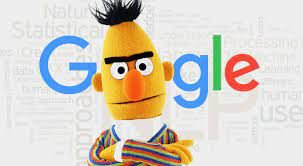<\center>

$\;\;\;\;\;\;$ 



[Back to Table of Contents](#0.1)

# 2. High Level Overview of BERT <a class="anchor" id="2"></a>

ここで、BERT* アーキテクチャの概要を説明します。これは、トランスフォーマー*をベースにしたモデル・アーキテクチャであり、NLPタスクを扱う上で新しい時代を切り開くものです。前回のセッションでは、*Transformer*について学びました。トランスフォーマーは、*Encoder-Decoder*モデル・アーキテクチャで、*positional encoding*、*self-attention*、*multi-head attention*、また、*Residual connection*を使用します。

$\;\;\;\;\;\;$ 

<center><img src = "https://glassboxmedicine.files.wordpress.com/2019/08/figure1modified.png?w=451&h=647" width = 400 height = 400 /> <\center>

$\;\;\;\;\;\;$ 

BERTは、Transformerの構造のうち、「Encoder」の部分のみを使用し、「Decoder」の部分は使用しません。
BERTもTransformerと同様、postional encoding、self attention、multi head attention、Residual Connectionを採用しています。
  つまり、BERTは基本的に「**Stacking of Encoders**」であり、エンコーダはTransformerのものを使用しています。

$\;\;\;\;\;\;$ 

<center><img src = "http://jalammar.github.io/images/bert-encoders-input.png" width = 700 height = 400 /><\center>

$\;\;\;\;\;\;$ 

There are two types of BERT.
 
 1.$BERT$ $base$
    
 2.$BERT$ $large$


bert_baseでは、12個のエンコーダを重ねて使用しています。一方、bert_largeでは24個のエンコーダを重ねて使用します。また、フィードフォワードネットワークとはタイプ（隠れニューロンの数）が異なります。bert_baseでは768個のニューロンがフィードフォワードネットワークに使用されているのに対し、bert_largeでは1024個の隠れユニットが使用されています。

$\;\;\;\;\;\;$ 

<center> <img src = "http://jalammar.github.io/images/bert-base-bert-large-encoders.png" width = 600 height = 350 /> <\center>
    
$\;\;\;\;\;\;$ 
    
[Back to Table of Contents](#0.1)

# 3. How BERT comes and why it becomes so popular ? <a class="anchor" id="3"></a>

現在では、BERTは、さまざまなNLPタスクの解決に取り組むための最初の選択肢となっています。なぜBERTはNLPコミュニティでそれほど人気があるのでしょうか？それは、SOTA（State Of The Art）モデルであるということだけではなく、その背景にはいくつかの理由があります。その理由は、大きく3つに分けられます。
        
   1. Limitations of Transformer 
   2. Transfer Learning in NLP
   3. Fully replacement of LSTM
 

### 1. Limitations of Transformer <a class="anchor" id="3.1"></a>

間違いなく、NLPにおけるトランスフォーマーの発明は、NLPコミュニティにおける最も強力で効率的な研究の一つです。NLPタスクを別の方法で記述することで、NLPモデルを独立して学習することができます。その結果、*並列化*が可能となり、LSTM/GRUベースのモデルよりも学習プロセスがはるかに速くなります。LSTM/GRUモデルは、機械翻訳などのさまざまなタスクで実現されているため、LSTMの代替品として考えている関係者もいるようです。これは、TransformerがLSTMよりも長期的な依存関係を扱うことができるという事実によって、さらに悪化しました。


機械翻訳のようないくつかのNLPタスクを解決することができるエンコーダ-デコーダアーキテクチャのためにうまく設計されています。しかし、エンコーダ-デコーダアーキテクチャを使用しないタスクは、**テキスト分類、文ペアタスク**などのように、もっとたくさんあります。このようなタスクでは、「トランスフォーマ」をどのように使えばよいのでしょうか。ここにトランスフォーマーの限界があります。この制限のために、LSTMに置き換えることができません。


### 2.  Transfer Learning in NLP <a class="anchor" id="3.2"></a>

転移学習(Transfer Learning)とは、事前に学習したモデルを新しい問題に再利用することです。比較的少ないデータで深いニューラルネットワークを学習できるため、現在、深層学習で非常に人気があります。ほとんどの現実世界の問題は、そのような複雑なモデルを訓練するための何百万ものラベル付きデータポイントを持っていないのが普通なので、これはデータサイエンスの分野で非常に有用です。

転移学習は、学習プロセスの高速化だけでなく、効率的なモデルの構築にも利用されています。コンピュータビジョンのタスクでは、転移学習が広く使われています。膨大な量の画像データを用いてロバストなモデルを学習し、最適な重みを見つけ出します。そして、そのモデルは、事前に学習されたモデルとして、下流のコンピュータビジョンタスクに使用することができます。そのため、いくつかのNNレイヤーを追加し、事前に学習したモデルを微調整することで、その下流のタスクに対して効率的なモデルを簡単に構築することができます。コンピュータビジョンにおける事前学習済みモデルには、VGG-16、ResNet、ImageNet、LeNet、Efficient netなどがあります。

コンピュータビジョンでは、何百万ものデータを使ってよく訓練されたモデルがあり、それらを使って物体認識タスクを簡単に行うことができます。ロバストで非常に正確なモデルを20行のコードで構築することができます。事前に学習されたモデルをインポートして、いくつかのレイヤーを微調整するだけで、望みの結果を得ることができます。


$\;\;\;\;\;\;$ 

<center>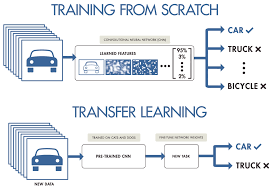</center>

$\;\;\;\;\;\;$ 

NLPの場合、プロセスはより複雑です。なぜなら、NLPでは、異なるテキストデータには異なる文脈が含まれているからです。文脈言語モデリングとは、文の文脈を意味します（例えば、*abide by*と*abide in*は、どちらも主要な単語*abide*を使用しているにもかかわらず、全く異なる意味を持っています）。より良い文脈言語モデリングを定義できれば、伝達学習を用いてより良いモデルを構築することができます。多くの研究の結果、文脈的言語モデルは **ELMo** や **ULMFiT** のようにいくつか作られ、人気を博している。ELMo**（**E**mbeddings from **L**anguage **Mo**dels）と**ULMFiT**（**U**niversal **L**anguage **M**odel **Fi**ne-**T**uning）はどちらもLSTMベースである。ELMoでは2層の双方向LSTMが、ULMFitでは3層のLSTMが使われている。

$\;\;\;\;\;\;$ 

<center><img src = "https://5b0988e595225.cdn.sohucs.com/images/20180529/0b0036d9bba548bfab470d4ca3d750fe.jpg" width = 500 height = 350 /></center>

$\;\;\;\;\;\;$ 


Here $E_1$, $E_2$, ... $E_N$ is the word embedding and $T_1$, $T_2$, ... $T_N$ is the output of the model

$\;\;$ 

<center><img src = "https://miro.medium.com/max/2128/1*ko2Ut74J_oMxF4jSo1VnCg.png" width = 400 height = 300 /></center>

$\;\;\;\;\;\;$ 

しかし、LSTMの代わりにtransformerを使って言語モデリングを構築できたらどうでしょうか。トランスフォーマはLSTMよりもはるかに高速であるため、より多くのデータを学習することができ、それによってはるかに優れた言語モデルを定義することができます。基本的には、トランスフォーマーを用いた言語モデルが必要であり、それは伝達学習の事前学習モデルとしても利用できる。

BERTの前に、OpenAIはGPT-2（**G**enerative **P**re-**T**raining）モデルを導入し、前節で述べた問題を解決することができます。GPT-2モデルはトランスフォーマーベースです。GPT-2のアーキテクチャを見てみると、GPT-2は12層のデコーダを積層しています（BERTとは異なり、デコーダのみを使用しています）。このモデルでは、トランスのエンコーダはキャンセルされています。このモデルではデコーダのみを使用しているため、デコーダ・アーキテクチャの**Encoder - Decoder Attention**ブロックもキャンセルされています。残りの部分は同じです。

$\;\;\;\;\;\;$ 

<center><img src = "http://jalammar.github.io/images/openai-transformer-language-modeling.png" width = 500 height = 600 />
    </center>

$\;\;\;\;\;\;$

変圧器の中のデコーダは、学習のために次の単語を予測するために**マスクされた自己注意**を使用することがすでにわかっています。そのため、デコーダは常にシフトした右の単語を予測語として与えます。これはフォワードLSTM（左から右へ）のように動作します。GPT-2では、トランスフォーマーを使って、任意のセンテンスの次の単語を自己回帰的に予測することができるので、トランスフォーマーを使った言語モデリングが可能です。 


$\;\;\;\;\;\;$ 


Here $E_1$, $E_2$, ... $E_N$ is the word embedding, $T_1$, $T_2$, ... $T_N$ is the output of the model and **Trm** is Transformer Decoder

$\;\;\;\;\;\;$ 


<center><img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzqbw7d8rNA-FnXKcPPR0hiFC9RFJVi4FkiVSUiETmOIrtQqFo7Uk6cPx8_k1qZ-spuqI&usqp=CAU" width = 300 height = 200 /> </center>

$\;\;\;\;\;\;$

GPT-2はtransformerを使った伝達学習の事前学習モデルとして使用されます。また、トランスフォーマーを様々なNLPタスクで使用できるようになります。GPT-2 ( Tansformer ) を様々なNLPタスクで使用する方法の全体像は以下の通りです。GPT-2の詳細については、以下をご覧ください [their blogs. ](https://openai.com/blog/tags/gpt-2/) 


$\;\;\;\;\;\;$ 


<center><img src = "https://www.topbots.com/wp-content/uploads/2019/04/cover_GPT_web.jpg" width = 550 height = 450 /></center>



$\;\;\;\;\;\;$ 


### 3.  Fully Replacement of LSTM <a class="anchor" id="3.3"></a>

前節では、OpenAI GPT-2がトランスフォーマーを使って、多くのNLPタスクでLSTMを置き換えることができることを見てきました。では、実際にGPT-2はLSTMを完全に置き換えることができるのか、という重要な疑問が生じます。答えは **NO** です。なぜなら、LSTMを使用している間に、双方向性を利用して、よりロバストで文脈に沿った言語モデリングを構築することができるからです。**双方向性LSTM**は、言語モデリングにおいてより良い文脈を理解します。GPT-2は左から右への順方向のみを使用するので、場合によっては、 **双方向性LSTM** は言語の文脈をよりよく理解して、よりよく機能します。そのため、LSTMを完全に置き換えることはできませんでした。さて、ここで一つの疑問が出てきます。**トランスフォーマーを使って**双方向性**を追加したモデルを構築することは可能でしょうか？**もし可能であれば、LSTMはトランスフォーマーによって完全に置き換えられることになります。

そこで、以下のようなモデルを構築する必要があります。

   1. **Is capable to use tranformer in all kinds of NLP task ?**
   2. **Can be used as a pre trained model for the downstream task while using transfer learning in NLP ?**
   3. **Is bi-directional and understands the language form left to right and right to left ?**
   4. **Understands deeper and better context of the language**
     


<h2><center>Then BERT said,</center></h2>  


 $\;\;\;\;\;\;$
 
 <center>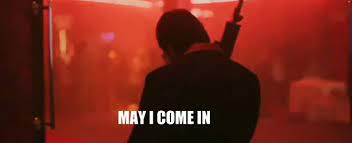</center>
 
 $\;\;\;\;\;\;$ 
 
 [Back to Table of Contents](#0.1)
 
 
 

# 4. What is inside the BERT ? <a class="anchor" id="4"></a>

**BERT**の基本的な概要はすでに見たとおりです。基本的に、BERTは**Encoders**の積み重ねです。さて、そろそろなぜエンコーダだけを使うのかを説明しましょう。それは、BERTをあらゆる種類のタスクに使用するためです。もう1つの理由は、OpenAI GPT-2がデコーダのスタッキングを使用していることを見たからです。また、OpenAI GPT-2では、デコーダを重ねて使用しているため、自動回帰モデル（次の単語の予測）でモデルを構築しています。そのため、一方向性（左から右）の変換アーキテクチャを定義することができました。双方向トランスのアーキテクチャを構築するために、BERT は、デコーダの代わりにトランスからエン コーダを使用する。そのため、BERTは、左から右だけでなく、右から左のモデルも構築しています。BERTの簡単な概要は以下の通りです :-


 $\;\;\;\;\;\;$
 
<center> <img src = "https://miro.medium.com/max/745/1*-oQKmzvHrzqeSQEnM9f_kQ.png" width = 450 height = 450 /></center>

$\;\;\;\;\;\;$

さて、BERTの中身はどうなっているのでしょうか？それは、単にエンコーダを積み重ねただけではなく、さらに多くの機能を備えています。BERTには、マスクド・ランゲージ・モデリングや次文予測も導入されています。BERTには大きく分けて4つの部分があります。

 
          1. From Word to Vectors
          2. The Encoders from the transformer
          3. Masked Language Modeling (MLM)
          4. Next Sentence Prediction (NSP)
      
 
そろそろ、これらの部分についての説明をしたいと思います。まず最初に、BERTは一度に2つの文を入力として受け取ることを知っておく必要があります。それらを文Aと文Bとします。

## 1. From Word to Vectors <a class="anchor" id="4.1"></a>

 $\;\;\;\;\;\;$
 
<center><img src = "https://miro.medium.com/max/1250/1*9DD12JPwj1pLY6yUEOv35A.png" width = 900 height = 800 /> </center>
<center><img src = "https://miro.medium.com/max/1250/1*Y1MDr4WgzYp4eZaBOuJIYw.png" width = 900 height = 800 /> </center>
 
- **Tokenization** は、トークンと呼ばれる断片に切り刻む作業であり、同時に句読点などの特定の文字を捨てることになります。

$\;\;\;$

- **Using wordpieces** (e.g. playing -> play + ##ing) を単語の代わりに使用しています。これは、語彙のサイズを小さくするのに有効で、各単語で利用可能なデータ量を増やすことができます。
$\;\;\;$


- **Numericalization** は、各トークンを、コーパスの語彙の中の一意の整数にマッピングすることを目的としています。

$\;\;\;$


- **Token embedding** は、シーケンスの各単語の埋め込み（すなわち、実数のベクトル）を取得するタスクである。シーケンスの各単語は、学習時にモデルが学習するemb_dim次元のベクトルにマッピングされます。これは、各トークンに対するベクトルのルックアップと考えることができます。これらのベクトルの要素は、モデルのパラメータとして扱われ、他の重みと同様にバックプロパゲーションによって最適化されます。

$\;\;\;$

- **Padding** は、バッチ内の入力配列を同じ長さにするために使用されました。つまり、'<pad>' トークンを追加することで、いくつかのシーケンスの長さを増やします。

$\;\;\;$


- **Positional encoding** 位置エンコーディングは、モデルがトークンの順序や相対的な位置関係を学習するのに役立つように設計されています。RNN、GRU、LSTMなどの伝統的なリカレントユニットを使用していないため、これは言語ベースのタスクには特に重要です。

 直感的には、特定の単語の位置に応じて、表現された意味を変更できるようにすることが目的です。単語の完全な表現を変えるのではなく、トークンエンベッディングにあらかじめ決められた（学習されていない）正弦波関数を使って[-1,1]の間の数字を加えることで、その位置をエンコードするために少し修正したいのです。エンコーダーの残りの部分では、単語がどの位置にあるかによって（同じ単語であっても）単語の表現が少しずつ異なります。

エンコーダは、ある単語が特定の位置にある一方で、同じ配列の中で他の単語が他の特定の位置にあるという事実を利用できなければなりません。つまり、絶対的な位置だけでなく、相対的な位置も理解できるようにしたいのです。
 
 Now, the function use for the positional encoding is given below:
 
  $\;\;\;\;\;\;$
<center> <img src = "https://miro.medium.com/max/625/1*OsmkGAkon5IDTwZJ1ORwPA.png" width = 550 height = 550 /> </center>
  $\;\;\;\;\;\;$
  
  ここで、なぜこの関数は正弦関数を使っているのか、なぜこの関数は単一のsinまたはcos関数を使わないのか、そして最後に、なぜこのエンコーディングは連結ではなくエンコーディングで加算されているのか、といったいくつかの疑問が生じます。まず第一に、何かを符号化するときには、二値化が第一の選択肢です。しかし、NNモデルの重みやバイアスなどはすべて[-1, 1]の範囲であることがわかっています。ですから、もしバイナリエンコーディングを使用したいのであれば、浮動小数点の連続した値をエンコーディングする必要があります。 明らかに、浮動小数点値のバイナリエンコーディングは、はるかに複雑で、非常にスペースの無駄です。このような状況を解決するために、彼らは正弦波関数を使用しました。  
  
  また、この関数ではsinとcosの組み合わせを使用していますが、これはバイナリエンコーディングを使用した場合、代替ビットと同等の働きをするからです。単一のsinまたは単一のcosではこのようなことはできません。例えば、**pos = 0**と**index = 0,1**の場合、この関数はそれぞれ**0,1**を返します。最後に、この位置関係の符号化は、特徴の良いソースを提供し、より小さいdimベクトルを格納するために、連結ではなく、埋め込み表現でまとめられます。(連結すると、より高次元のベクトルを格納する必要があります)
  
   $\;\;\;\;\;\;$
  
- **Sentence embedding** の技術は、文章全体とその意味情報をベクトルとして表現します。これにより、機械は文章全体の文脈や意図、その他のニュアンスを理解することができます。機械は、どの単語がどの文に属しているかを単純に認識します。文章Aまたは文章Bを示すマーカーが各トークンに追加されます。これにより、モデルはセンテンスを区別することができます。
  
$\;\;\;\;\;\;$
 
<h3><center>After the first step, we done our embedding and encoding step just like</center></h3>
$\;\;\;\;\;\;$

<center><img src = "https://www.researchgate.net/profile/Akbar-Karimi-4/publication/338934952/figure/fig2/AS:853247933808640@1580441568270/BERT-word-embedding-layer-Devlin-et-al-2018.ppm" width = 550 height = 550 /></center>
 
 $\;\;\;\;\;\;$
    
    
[Back to Table of Contents](#0.1)

## 2. The Encoders from the transformer <a class="anchor" id="4.2"></a>

変圧器のアーキテクチャは、エンコーダ-デコーダ形式に基づいています。エンコーダは、4つの部分（自己注目、マルチヘッド注目、残差接続と正規化、フィードフォワードネットワーク）で構成されています。変圧器アーキテクチャのエンコーダは次のようになります。

$\;\;\;\;\;\;$

<center><img src = "https://www.adityaagrawal.net/blog/assets/dnn/bert_encoder.png" width = 200 height = 250 /></center>

$\;\;\;\;\;\;$

トランスのエンコーダ部には、4つの測定部があることがエンコーダの構造からわかりました。トランスのエンコーダアーキテクチャの全体像を理解するには、以下の項目を理解する必要があります。

        i.   Attention Score Measurement
        ii.  Self Attention and its intuition
        iii. Multi Head Attention/ Self Attention
        iv.  Add & Norm
         v.  Feed Forward Network
        
 これらのトピックはすでにカバーされています。それらのトピックについて簡単に振り返ってみましょう。
 
 - **i. Attention Score Measurement**
  
 $\;\;\;\;\;$

注意メカニズムは、入力データの関連する特徴を動的に強調することを可能にする神経アーキテクチャの一部であり、NLPでは通常、一連のテキスト要素である。これは、生の入力に直接適用することもできるし、その高レベルの表現に適用することもできる。アテンションスコアの測定にはいくつかの機能があります（例：加算アテンションスコア、ドットプロダクトアテンションスコア）。最も一般的なのは、クエリ、キー、値のベクトルを生成して、ドット積アテンションスコアを使用する方法です。このようなアテンションスコアの測定に使用される関数を以下に示します。


<center><img src = "https://miro.medium.com/max/3512/1*EphJAS1hwU9NNmUQMxv92w.png" width = 500 height = 600 /></center>

$\;\;\;\;\;\;$

- **ii.  Self Attention and its intuition**

*自己言及（Self-attention）*は、*内言及（Intra-attention）*とも呼ばれ、同じ配列の表現を計算するために、1つの配列の異なる位置を関連付ける注目メカニズムです。

   - エンコーダの各入力ベクトルから3つのベクトルを作成する
   - 各単語に対して、Query ベクトル、Key ベクトル、Value ベクトルを作成します。
   - これらのベクトルは、エンベッディングに、学習過程で学習した3つのマトリックスを掛け合わせて作成されます。
   
   $\;\;\;$
   
 <center><img src = "https://lh5.googleusercontent.com/-PLfe9_p8Y4dySneLd-hNCtPkXiOK3oKh_TG_oZV-TMVEXXkfBe7_tX2DnFWAcVNQGpDlehwJJDlyH88F9-RMtCOszNYfj3ixhsuwcC1avfMDHS7yXTLgQaoYgRN5ak1K34qiz8lv78" width = 500 height = 600 /></center>
   
  $\;\;\;$
  
各単語の埋め込みに対して3つのベクトル（$Q$,$K$,$V$）を生成する必要があるのは、各単語の注目度スコアを、その単語が属する入力配列のすべての単語で求める必要があるからです。
各単語の埋め込みに対して、3つの重みメトリック（$W_Q$,$W_K$,$W_V$）を掛けて、3つのベクトル（$Q$,$K$,$V$）を生成します。これらの指標はバックプロパゲーションによりモデルで学習されます。 
 
 $\;\;\;$
 
 <center><img src = "https://jalammar.github.io/images/t/self-attention-matrix-calculation.png" width = 400 height = 400 /></center>
 
 $\;\;\;$
 

これらの新しいベクトルは、エンベッディング・ベクトルよりも次元が小さいことに注意してください。エンベッディングとエンコーダーの入出力ベクトルの次元数が512であるのに対し、これらのベクトルの次元数は64です。
エンコーダの各入力ベクトルから3つのベクトルを作成する
 
**Why is dimensionality 64?**

As we must have :

   - Output’s dimension is [length of input sequences] x [dimension of embeddings — 512]

   - We use 8 heads during the Multi-head Self-Attention process. The output size of a given self-attention vector is [length of input sequences] x [64]. So the concatenated vector resulting from all Multi-head Self-Attention process would be [length of input sequences] x ([64] x [8]) = [length of input sequences] x ([512])


So, we will get a 64 dimension query, key, and value vector for each word. An example is given below:

  
  $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/3000/1*yw2PxgzsjNNKE-UaVoZESQ.png" width = 1000 height = 1000 /></center>

$\;\;\;\;\;\;$

  
  $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/3000/1*R9NE3rNKGO1ThN2jhZYBRg.png" width = 600 height = 600 /></center>

$\;\;\;\;\;\;$

- **iii. Multi Head Attention**

マルチヘッドアテンションとは、1つの単語に対して、複数の単語に連続して注意を払い続けることです。マルチヘッドアテンションは、アテンションメカニズムを複数回並行して実行するアテンションメカニズムのモジュールです。直感的には、複数の注意ヘッドは、シーケンスの部分に異なる方法で注意を払うことができます(例えば、長期的な依存関係と短期的な依存関係).

**Why do we need multi head attention ?**

セルフアテンションを行っていると、他の単語とのアテンションスコアよりも、その単語単体でのアテンションが非常に高くなることが観察されます。これは、モデルが文脈を理解する上で障害となる可能性があります。そこで、自己注目度を複数回測定することで、この問題を少しでも減らすことができます。

  
  $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/1270/1*LpDpZojgoKTPBBt8wdC4nQ.png" width = 500 height = 500 /></center>

$\;\;\;\;\;\;$

  
  $\;\;\;\;\;\;$

<center><img src = "https://jalammar.github.io/images/t/transformer_multi-headed_self-attention-recap.png" width = 900 height = 900 /></center>

$\;\;\;\;\;\;$


<h3><center>Till now the whole picture is like that</center></h3>.  

  $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/3000/1*tbb9rywOeo3kBtJ85ZdPFA.png" width = 900 height = 900 /></center>

$\;\;\;\;\;\;$


  $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/3000/1*mllxBXok93AsQ_m43D3v_g.png" width = 900 height = 900 /></center>

$\;\;\;\;\;\;$


- **iv. Add and Norm** 

ここでAddは残差接続を、normはレイヤーの正規化を意味します。また、この層ではオーバーフィッティングを抑えるためにドロップアウトを使用しています。

$\;\;$

$$
\text{ Layer Norm }(x+\text{Dropout}(\text{ Sublayer}(x)))
$$

$\;\;\;\;\;\;$

次の例を見てみましょう。


  $\;\;\;\;\;\;$

<center><img src = "http://jalammar.github.io/images/t/encoder_with_tensors.png" width = 500 height = 500 /> </center>

$\;\;\;\;\;\;$

Here, Self attention is the sublayer and X = [x1, x2] , Z = [z1, z2]


Layernormでは、層ごと、学習点ごとに、平均0、分散1となるように入力を変更します（さらに2つのパラメータを追加します）。層の正規化の式は

$$
\mu^{l}=\frac{1}{H} \sum_{i=1}^{H} a_{i}^{l}
$$

$$\quad h_{i}=f\left(\frac{g_{i}}{\sigma_{i}}\left(a_{i}-\mu_{i}\right)+b_{i}\right)$$

$$\quad \sigma^{l}=\sqrt{ \frac{1}{H} \sum_{i=1}^{H}\left(a_{i}^{l}-\mu^{l}\right)^{2} }$$


ここで$l$は層、$mu$は平均、$sigma$は分散を表しています。

$\;\;\;\;\;\;$

- **v. Feed Forward Network**

注意サブレイヤーに加えて、エンコーダとデコーダの各レイヤーには、完全に接続されたフィードフォワードネットワークが含まれており、このネットワークは各ポジションに別々に、かつ同一に適用されます。これは、ReLU活性化を挟んだ2つの線形変換で構成されており、次の式で簡略化できます。

$\;\;$

$$
\operatorname{FFN}(x)=\max \left(0, x W_{1}+b_{1}\right) W_{2}+b_{2}
$$


$\;\;\;\;\;\;$


[Back to Table of Contents](#0.1)

## 3. Masked Language Modeling (MLM) <a class="anchor" id="4.3"></a>

BERT の最大の特徴の一つは、Masked Language Modeling（MLM）です。マスクド言語モデルは、入力からトークンの一部をランダムにマスクし、その目的は、その文脈のみに基づいて、マスクされた単語の元の語彙IDを予測することです。左から右への言語モデルの事前学習とは異なり、MLMの目的では、左と右の文脈を融合した表現が可能であり、これにより、深層の双方向トランスフォーマーを事前学習することができます。


単語列を BERT に入力する前に、各列の単語の 15%が [MASK] トークンに置き換えられます。次に、モデルは、シーケンス内の他の（マスクされていない）単語によって提供される文脈に基づ いて、マスクされた単語の元の値を予測しようとします。技術的には、出力される単語の予測には以下が必要です。

     1. エンコーダ出力の上に、分類層を追加する。
     2. 出力ベクトルに埋め込み行列を掛けて、語彙次元に変換する。
     3. softmaxを用いて、語彙に含まれる各単語の確率を計算する。
 
$\;\;\;\;\;\;$



<center><img src = "https://miro.medium.com/max/3300/0*ViwaI3Vvbnd-CJSQ.png" width = 600 height = 600 /></center>

$\;\;\;\;\;\;$

ここで、$w_1$,...$w_5$は、単語の埋め込みであり、$O_1$,...$O_5$は、BERTの出力である。BERTは、GELU（Gaussian Error Linear Unit）活性化を使用します。

$$
\operatorname{GELU}(x):=x \mathbb{P}(X \leq x)=x \Phi(x)=0.5 x\left(1+\operatorname{erf}\left(\frac{x}{\sqrt{2}}\right)\right)
$$

BERT 損失関数は、マスキングされた値の予測のみを考慮し、マスキングされていない単語の予測を 無視します。その結果、このモデルは方向性のあるモデルよりも収束が遅くなりますが、この特性はコンテキスト認識の向上によって相殺されます。

The overview of MLM in BERT looks like

$\;\;\;$
<center><img src = "http://jalammar.github.io/images/BERT-language-modeling-masked-lm.png" width = 600 height = 600 /></center>

$\;\;\;$

Some important notes about are the following

- **It is true bi-directional** 
  
  BERTのMLM以前の双方向とは、単に左から右、右から左への単語表現を生成し、その2つの方向性の表現を単純に加算または連結することを意味していました。例えば、双方向のLSTMを使用する場合、1つのLSTMは左から右に向かって単語の表現を生成し、もう1つのLSTMは右から左に向かって単語の表現を生成します。その後、生成された単語の表現を連結します。しかし、LSTMは言語に関する文脈をあまり理解しません。しかし、MLMの場合は、テキスト内の単語をマスクするので、両側からモデルを学習する必要がありません。また、マスクされた単語はテキスト内にあるので、BERTは他の単語からマスクされた単語への方向を自動的に追跡します。
  

In [ ]:
import os
from IPython.display import Image
#Image(filename="kaggle/input/bert-img/mlm_2.jpg", width= 500, height=500)

- **Semi Supervised Training**

  BERT は、入力テキストからランダムに単語をマスキングし、マスキングされた単語を予測して 学習するため、ラベル付きの教師付きデータを使用する必要はありません。したがって、BERT の学習には、教師なしデータと教師ありデータの両方を使用することができます。半教師付きデータは BERT の学習に使用できるため、学習用の膨大なデータを得ることができます。これにより、よりロバストでコンテクストなモデルを構築することができます。
  
[Back to Table of Contents](#0.1)

## 4. Next Sentence Prediction (NSP) <a class="anchor" id="4.4"></a>

OpenAIトランスフォーマーがさまざまなタスクを処理するために行っている入力変換を振り返ってみると、いくつかのタスクでは、モデルが2つの文章について何かインテリジェントなことを言う必要があることに気づくでしょう（例えば、それらは単にお互いの言い換えバージョンなのか？入力として wikipedia の項目があり、別の入力としてその項目に関する質問がある場合、その質問に答えることができますか？)

BERT が複数の文の間の関係をより適切に処理できるようにするために、事前訓練プロセスには追加 の作業(2つの文（AおよびB）が与えられた場合、BはAに続く文である可能性が高いか、またはそうでないか)が含まれています。


BERT の訓練過程において、モデルは、入力として文のペアを受け取り、ペアの 2 番目の文が元の 文書における後続の文であるかどうかを予測することを学習します。訓練中、入力の 50%は、2 番目の文が元の文書の後続文であるペアであり、残りの 50%は、コーパスからのランダムな文が 2 番目の文として選択される。ランダムな文は、最初の文から切り離されていることが前提です。

学習時にモデルが2つの文を区別できるように、モデルに入力する前に入力を以下のように処理します。

- 最初の文の最初に[CLS]トークンが挿入され、各文の最後に[SEP]トークンが挿入されます。
- 各トークンには文節Aまたは文節Bを示す文の埋め込みが追加されます。センテンスエンベッディングは、トークンエンベッディングと同様の概念で、語彙数は2です。
- 位置エンベッディングは、シーケンス内の位置を示すために、各トークンに追加されます。位置埋め込みの概念と実装については、Transformerの論文で紹介されています。

$\;\;\;\;\;\;$

<center><img src = "https://www.researchgate.net/profile/Akbar-Karimi-4/publication/338934952/figure/fig2/AS:853247933808640@1580441568270/BERT-word-embedding-layer-Devlin-et-al-2018.ppm" width = 550 height = 550 /> </center>
 
 $\;\;\;\;\;\;$
 
 2つ目の文章が1つ目の文章と本当につながっているかどうかを予測するために、以下のステップが実行されます。
- 入力シーケンス全体がTransformerモデルを通過します。(入力ベクトルのサイズは、BERT Baseでは各単語に対して768である）（**なぜ768なのか**以下に回答を示す
- 各ポジションは、サイズhidden_size（BERT Baseでは768）のベクトルを出力します。
- CLS]トークンの出力は、単純な分類層（重みとバイアスの学習済み行列）を使用して、2×1の形状のベクトルに変換されます。
- ソフトマックスを用いて、IsNextSequence（IsNextラベルとNotNextラベル）の確率を計算します。

For example,

            Input = [CLS] the man went to [MASK] store [SEP] he bought a gallon [MASK] milk [SEP]
            Label = IsNext
            Input = [CLS] the man [MASK] to the store [SEP] penguin [MASK] are flight ##less birds [SEP]
            Label = NotNext

BERT モデルを学習する際には、Masked LM と Next Sentence Prediction が一緒に学習され、2 つの戦略の複合損失関数を最小化することを目的としています。さて、この場合のBERTモデル全体は次のようになります。

$\;\;\;\;\;\;$

<center><img src = "http://jalammar.github.io/images/bert-next-sentence-prediction.png" width = 750 height = 750 /></center>
 
 $\;\;\;\;\;\;$
 
 
 BERT_baseモデルでは、なぜ1つの単語の入力と出力が764次元のベクトルを持っているのでしょうか？
 
 BERT_baseモデルでは、マルチヘッドアテンションに12個のアテンションヘッドを使用しています。BERT_baseモデルでは、マルチヘッドアテンションに12個のアテンションヘッドを使用しています。各ヘッドには64次元のキー、クエリ、値のベクトルが含まれており、これにより1つの単語に対して自己アテンションスコアを持つ64個のダイムスベクトルを得ることができます。
         
         So, the input and output vector of a single token/word will be = 12 X 64 = 768  dimesion embedding  


[Back to Table of Contents](#0.1)

# 5. BERT as Transfer Learning in NLP <a class="anchor" id="5"></a>

BERT はラベルのない文のペアを取り、MLM は言語の文脈をよく理解するため、BERT は膨大な データセットに対して学習することができ、これを下層タスクの事前学習モデルとして使用することができます。事前学習の手順は、言語モデルの事前学習に関する既存の文献にほぼ従っている。BERT は、事前訓練用コーパスとして、BooksCorpus（8 億語）および英語版 Wikipedia（25 億語）を使用しています。長い連続した配列を抽出するためには、10 億語ベンチマークのようなシャッフルされた文レベルのコー パスではなく、文書レベルのコーパスを使用することが重要です。

$\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/875/1*-j96GYxnl4f44tD8dJTpng.png" width = 650 height = 650 /> </center>
 
 $\;\;\;\;\;\;$

上の図は、BERT の全体的な事前トレーニングと微調整の手順を示しています。出力層を除いて、事前学習と微調整の両方で同じアーキテクチャが使用されています。また、異なるダウンストリーム・タスクのモデルを初期化するために、同じ事前トレーニング済みモデル・パラメータが使用されます。
 ファインチューニングでは、すべてのパラメータが微調整されます。
 [CLS]は、すべての入力例の前に追加される特別な記号であり、[SEP]は、特別なセパレータートーク ンです（例：質問／回答の分離）。 
BERT は、教師なしデータに対して訓練されているが、BERT は、教師ありタスクで微調整することができます。

下流の教師付きタスク（例えば、質問応答タスク）でBERTを事前学習モデルとして使用した場合、全体像は次のようになります。


$\;\;\;\;\;\;$

<center><img src = "https://www.determined.ai/assets/images/posts/nlp_transfer_learning.png" width = 750 height = 750 /></center>
 
 $\;\;\;\;\;\;$

画像分類にBERTを使用したい場合、BERTの伝達学習プロセスは次のようになります。


$\;\;\;\;\;\;$

<center><img src = "http://jalammar.github.io/images/BERT-classification-spam.png" width = 750 height = 750 /> </center>
 
 $\;\;\;\;\;\;$



[Back to Table of Contents](#0.1)

# 6. BERT for Different NLP tasks <a class="anchor" id="6"></a>

変形器を直接、異なるタスクに使用することはできないが、BERTは可能であるとすでに述べました。どのようにしてBERTを様々なNLPタスクに使うことができるのでしょうか。そのいくつかを以下に紹介します。


- **a. Sentence Pair Classification task** <a class="anchor" id="6.1"></a>

    文対分類では、データセットの各例には、適切なターゲット変数とともに2つの文があります。例：文の類似性、含意関係など。文章ペアはすべての分類サブタスクでサポートされています。MNLI、QQP、SWAGなど、文ペア分類タスクに関する多くのデータセットがあります。このタスクでBERTを微調整することができます。
    
    この課題を解決するために、BERT は、2 つの文（文 1 と文 2）を入力します。両方の文は [SEP] トークンで区切られており、これらの文の前に [CLS] トークンが挿入されています。ここで、これらの文を事前に訓練されたBERTに渡すと、[CLS]トークンは、これらの文を分類することで確率を与えます。入力に対してラベル出力が与えられているので、ラベル出力による損失を決定することで、BERTを使用して文ペア分類モデルを訓練することができます。
    
    

$\;\;\;\;\;\;$

<center><img src = "https://media.geeksforgeeks.org/wp-content/uploads/20200422012400/Single-Sentence-Classification-Task.png" width = 400 height = 400 /> </center>
 
 $\;\;\;\;\;\;$
 
また、より正確な結果を得るために、今回の下流のタスクを解決するための[CLS]トークンの上部にあるラベルで損失を計算する前に、多層パーセプトロン（MLP）（別名：Dense Layers）を使用することができます。トップにMLPを使うと、次のようになります。:

$\;\;\;\;\;\;$
 <center> <img src = "https://d2l.ai/_images/bert-two-seqs.svg" width = 400 height = 400 /> </center>
 $\;\;\;\;\;\;$
 
 
 [Back to Table of Contents](#0.1)
 
 
 
 - **b. Single Sentence Classification task** <a class="anchor" id="6.2"></a>
 
     一文分類タスクでは、一文が与えられ、その一文を分類するように求められます。例えば、電子メールの本文が与えられた場合、その電子メールがスパムであるかどうかを予測する必要があります。SST-2やCoLAは、この種のタスクのためのデータセットです。
     
     さて、この種の課題に BERT を使用するために、BERT 入力に 1 つの文を渡します。入力の最初（文の前）には、[CLS]が挿入されています。ここで、文を事前に訓練されたBERTに渡すと、[CLS]トークンは、文を分類することで確率を与えます。入力に対するラベル出力が与えられているので、ラベル出力による損失を決定することで、BERTを使用して単文分類モデルを訓練することができます。
     
     
$\;\;\;\;\;\;$

<center> <img src = "https://media.geeksforgeeks.org/wp-content/uploads/20200422012400/Single-Sentence-Classification-Task.png" width = 400 height = 400 /> </center>

$\;\;\;\;\;\;$

また、より正確な結果を得るために、[CLS]トークンの上部にあるラベルで損失を計算する前に、多層パーセプトロン(MLP)(別名Dense Layers)を使用することができます。トップにMLPを使用すると、次のようになります。

$\;\;\;\;\;\;$
 <center> <img src = "https://d2l.ai/_images/bert-one-seq.svg" width = 400 height = 400 /> </center>
 $\;\;\;\;\;\;$
 
 
 [Back to Table of Contents](#0.1)
 
 
 


 
 - **c.  Question Answering Task** <a class="anchor" id="6.3"></a>
 
     質問応答タスクについて、BERT は、入力質問と通路を単一のパックされたシーケンスとして受け取る。入力エンベッディングは、トークンエンベッディングとセグメントエンベッディングの合計です。
 
 $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/680/1*gwu3JjZ3hM08dIUziSJ3yg.png" width = 400 height = 400 /> </center>
 
 $\;\;\;\;\;\;$
 
 
 質問応答システム用に BERT を微調整するために、開始ベクトルおよび終了ベクトルを導入します。各単語が開始単語である確率は、通路シーケンスにおける単語の最終的な埋め込みと開始ベ クトルとの間のドット積を取り、その後、すべての単語に対するソフトマックスを行うことにより計算します。最も高い確率の値を持つ単語が考慮されます。同様のプロセスを経て、エンドワードを見つけます。
   
   
  $\;\;\;\;\;\;$

<center><img src = "http://www.mccormickml.com/assets/BERT/SQuAD/end_token_classification.png" width = 500 height = 500 /></center>
 
 $\;\;\;\;\;\;$
 
 また、ソフトマックスを適用する前に、このダウンストラム・タスクのラベルを使って損失を計算する前に、多層パーセプトロン（MLP）（別名：密な層）を適用することもできます。しかし、MLPやsoftmaxは、文章中の全ての単語のトークンに適用されます。このタスクにMLPを適用した場合、全体像は次のようになります。
    
 $\;\;\;\;\;\;$

<center> <img src = "https://d2l.ai/_images/bert-qa.svg" width = 400 height = 400 /> </center>
 
 $\;\;\;\;\;\;$
 
 [Back to Table of Contents](#0.1)
 
 
    
 - **d. Single Sentence Tagging Task** <a class="anchor" id="6.4"></a>
 
     名前付き実体認識などの単文タグ付けタスク（文が与えられ、その文から任意の人や物の名前を見つけたい場合）では、入力のすべての単語に対してタグを予測する必要があります。すべての入力トークンの最終的な隠れた状態（変換器の出力）は、分類層に与えられ、すべてのトークンの予測を得ます。WordPieceトークナイザーは、いくつかの単語をサブワードに分割するので、単語の最初のトークンのみの予測が考慮されます。
 
 $\;\;\;\;\;\;$

<center><img src = "https://yashuseth.files.wordpress.com/2019/06/fig4.png" width = 400 height = 400 /> </center>
 
 $\;\;\;\;\;\;$
 
また、今回のダウンストラム課題では、ラベルによる損失を計算する前にMLP（別名Dense Layers）を使用することで、より良い結果を得ることができます。このタスクでは、[CLS]を除く各単語に対してMLPを適用します。このタスクにMLPを適用した場合、全体像は以下のようになります。
 
  $\;\;\;\;\;\;$

<center><img src = "https://d2l.ai/_images/bert-tagging.svg" width = 400 height = 400 /> </center>
 
 $\;\;\;\;\;\;$
 
 [Back to Table of Contents](#0.1)
 
 

# 7. Applications <a class="anchor" id="7"></a>

私たちは、BERTの魔法を見てきました。BERTは間違いなく、自然言語処理のための機械学習の使用における画期的なモデルです。BERTは、間違いなく自然言語処理のための機械学習の使用におけるブレイクスルーです。BERTが親しみやすく、迅速な微調整が可能であるという事実は、将来的に幅広い実用的なアプリケーションを可能にするでしょう。この要約では、過度な技術的詳細に溺れないようにしながら、論文の主旨を説明することを試みました。

BERT の異なるバリエーションは、現在、さまざまな実生活のプロジェクトで使用されています。ドメイン／アプリケーション固有のコーパスで訓練されたモデルは、事前に訓練されたモデルである。ドメイン固有のコーパスで学習したモデルは、BERT の微調整と比較して、それらのドメ インの NER などの下流の NLP 作業で微調整する際に、より優れた性能を発揮することが示されている。以下に、異なる実世界の NLP 問題を使用したいくつかのバリエーションを示します。

www.DeepL.com/Translator（無料版）で翻訳しました。

   - RoBERta (robustly optimized BERT for solving different tasks)
   - BioBERT (use for biomedical text)
   - SciBERT (use for scientific publications)
   - ClinicalBERT (use for clinical notes)
   - G-BERT (use for medical/diagnostic code representation and recommendation)
   - M-BERT from 104 languages for zero-shot cross-lingual model transfer (task-specific annotations in one language is used to fine-tune a model for evaluation in another language)
   - ERNIE (knowledge graph) + ERNIE (2) incorporates knowledge into pre-training but by masking entities and phrases using KG.
   - TransBERT — unsupervised, followed by two supervised steps, for a story ending prediction task
   - videoBERT (a model that jointly learns video and language representation learning) by representing video frames as special descriptor tokens along with text for pretraining. This is used for video captioning.
   - DocBERT (use for Document classification)
   - PatentBERT (Patent classification)
   

 

[Back to Table of Contents](#0.1)


# 8. References  <a class="anchor" id="8"></a>

- BERT Paper - https://arxiv.org/pdf/1810.04805.pdf
- OpenAI GPT2 - https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf
- ULMFit paper - https://arxiv.org/abs/1801.06146
- ELMo    - https://arxiv.org/abs/1802.05365
- Transformer - https://arxiv.org/abs/1706.03762
- Bidreactional RNN/LSTM - https://ieeexplore.ieee.org/document/650093
- WordPieces Embedding - https://arxiv.org/abs/1609.08144
- More About Transfromer - https://jalammar.github.io/illustrated-transformer/
- Bert Explanined - https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270
- Bert with hugging face - https://towardsdatascience.com/fine-tuning-a-bert-model-with-transformers-c8e49c4e008b
- Understanding Word Embedding - https://towardsdatascience.com/from-pre-trained-word-embeddings-to-pre-trained-language-models-focus-on-bert-343815627598
- Illustred bert - http://jalammar.github.io/illustrated-bert/
- Inside Bert - https://towardsdatascience.com/deconstructing-bert-part-2-visualizing-the-inner-workings-of-attention-60a16d86b5c1
- Deconstructing Bert  - https://towardsdatascience.com/deconstructing-bert-distilling-6-patterns-from-100-million-parameters-b49113672f77
- BERT in question answering - https://medium.com/saarthi-ai/build-a-smart-question-answering-system-with-fine-tuned-bert-b586e4cfa5f5
- Fine Tuning BERT - https://d2l.ai/chapter_natural-language-processing-applications/finetuning-bert.html
  
  
  
  
  [Back to Table of Contents](#0.1)

# 感想
本で転移学習付近を主に勉強したいと思いました(NLPもですが).

<h1><center>Thanks for reading</center></h1>
<h3><center>Pls, upvote this kernel if you find it useful !</center></h3>